# Data Set Download

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content

100% 2.29G/2.29G [00:14<00:00, 98.9MB/s]
100% 2.29G/2.29G [00:14<00:00, 165MB/s] 


In [7]:
! unzip /content/chest-xray-pneumonia.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0445-0001.jpeg  


# Preprocessing

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from skimage import exposure
from google.colab.patches import cv2_imshow
from torchvision import transforms, datasets
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [9]:
# Set the path to your data folders
train_path = '/content/chest_xray/train'
val_path = '/content/chest_xray/val'
test_path = '/content/chest_xray/test'



In [10]:
datafolder_train = datasets.ImageFolder(root=train_path)
datafolder_test = datasets.ImageFolder(root=test_path)

train_set_size, test_set_size = len(datafolder_train), len(datafolder_test)
print('Train size:', train_set_size, '\nTest size:', test_set_size)


Train size: 5216 
Test size: 624


In [11]:
datafolder_train.class_to_idx

{'NORMAL': 0, 'PNEUMONIA': 1}

Displaying images from train


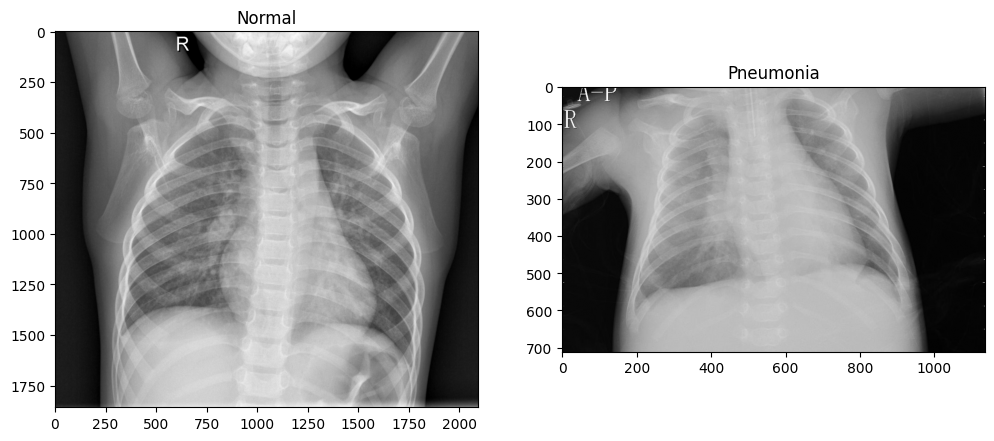

In [12]:

# Get the first image from the normal class in the training dataset
normal_img_path = datafolder_train.samples[0][0]
normal_img = Image.open(normal_img_path).convert('RGB')
normal_img = np.array(normal_img) / 255.0

# Get the first image from the pneumonia class in the training dataset
pneumonia_img_path = datafolder_train.samples[len(datafolder_train.samples)//2][0]
pneumonia_img = Image.open(pneumonia_img_path).convert('RGB')
pneumonia_img = np.array(pneumonia_img) / 255.0

# Display both images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.imshow(normal_img)
ax1.set_title('Normal')
ax2.imshow(pneumonia_img)
ax2.set_title('Pneumonia')
print(f"Displaying images from train")
plt.show()

Displaying images from test Folder


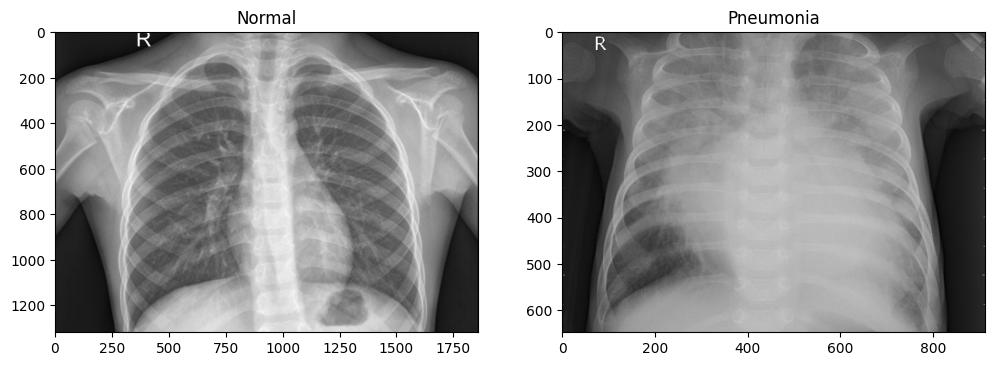

In [13]:
# Get the first image from the normal class in the training dataset
normal_img_path = datafolder_test.samples[0][0]
normal_img = Image.open(normal_img_path).convert('RGB')
normal_img = np.array(normal_img) / 255.0

# Get the first image from the pneumonia class in the training dataset
pneumonia_img_path = datafolder_test.samples[len(datafolder_test.samples)//2][0]
pneumonia_img = Image.open(pneumonia_img_path).convert('RGB')
pneumonia_img = np.array(pneumonia_img) / 255.0

# Display both images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.imshow(normal_img)
ax1.set_title('Normal')
ax2.imshow(pneumonia_img)
ax2.set_title('Pneumonia')
print(f"Displaying images from test Folder")
plt.show()


# Resize Train

In [14]:

# Define the transforms to resize the images to 256x256 pixels
resize_transform = transforms.Resize((256, 256))

# Apply the resize transform to all images in the training dataset
for i in range(len(datafolder_train)):
    # Get the path to the image file
    img_path = datafolder_train.samples[i][0]
    
    # Load the image and apply the resize transform
    img = Image.open(img_path).convert('RGB')
    img = resize_transform(img)
    
    # Save the resized image back to the same file
    img.save(img_path)
    

In [15]:
# Load the first image from the normal class in the training dataset
normal_img_path = datafolder_train.samples[0][0]
normal_img = Image.open(normal_img_path).convert('RGB')

# Load the first image from the pneumonia class in the training dataset
pneumonia_img_path = datafolder_train.samples[len(datafolder_train.samples)//2][0]
pneumonia_img = Image.open(pneumonia_img_path).convert('RGB')

# Print the sizes of both images
print("Normal image size:", normal_img.size)
print("Pneumonia image size:", pneumonia_img.size)


Normal image size: (256, 256)
Pneumonia image size: (256, 256)


# Resize Test

In [16]:
# Define the transforms to resize the images to 800x800 pixels
resize_transform = transforms.Resize((256, 256))

# Apply the resize transform to all images in the test dataset
for i in range(len(datafolder_test)):
    # Get the path to the image file
    img_path = datafolder_test.samples[i][0]
    
    # Load the image and apply the resize transform
    img = Image.open(img_path).convert('RGB')
    img = resize_transform(img)
    
    # Save the resized image back to the same file
    img.save(img_path)

In [17]:
# Load the first image from the normal class in the training dataset
normal_img_path = datafolder_test.samples[0][0]
normal_img = Image.open(normal_img_path).convert('RGB')

# Load the first image from the pneumonia class in the training dataset
pneumonia_img_path = datafolder_test.samples[len(datafolder_test.samples)//2][0]
pneumonia_img = Image.open(pneumonia_img_path).convert('RGB')

# Print the sizes of both images
print("Normal image size:", normal_img.size)
print("Pneumonia image size:", pneumonia_img.size)


Normal image size: (256, 256)
Pneumonia image size: (256, 256)


# Gray Scale Conversion and Histogram Equalization For Train

In [18]:
# Define the paths to the new subfolders
equalized_normal_path = "equalized_normal_train"
equalized_pneumonia_path = "equalized_pneumonia_train"

# Create the new subfolders if they don't already exist
if not os.path.exists(equalized_normal_path):
    os.makedirs(equalized_normal_path)
if not os.path.exists(equalized_pneumonia_path):
    os.makedirs(equalized_pneumonia_path)

# Loop through all images in the training dataset
for i in range(len(datafolder_train)):
    # Get the path to the image file
    img_path = datafolder_train.samples[i][0]
    
    # Load the image and convert it to grayscale
    img = Image.open(img_path).convert('L')
    
    # Perform histogram equalization on the image
    img_array = np.array(img)
    img_eq_array = exposure.equalize_hist(img_array)
    img_eq = Image.fromarray(np.uint8(img_eq_array * 255))
    
    # Determine the class of the image (normal or pneumonia) and save the equalized image to the appropriate subfolder
    if "NORMAL" in img_path:
        img_eq.save(os.path.join(equalized_normal_path, os.path.basename(img_path)))
    elif "PNEUMONIA" in img_path:
        img_eq.save(os.path.join(equalized_pneumonia_path, os.path.basename(img_path)))



# Gray Scale Conversion and Histogram Equalization For Test

In [19]:
# Define the paths to the new subfolders
equalized_normal_path = "equalized_normal_test"
equalized_pneumonia_path = "equalized_pneumonia_test"

# Create the new subfolders if they don't already exist
if not os.path.exists(equalized_normal_path):
    os.makedirs(equalized_normal_path)
if not os.path.exists(equalized_pneumonia_path):
    os.makedirs(equalized_pneumonia_path)

# Loop through all images in the test dataset
for i in range(len(datafolder_test)):
    # Get the path to the image file
    img_path = datafolder_test.samples[i][0]
    
    # Load the image and convert it to grayscale
    img = Image.open(img_path).convert('L')
    
    # Perform histogram equalization on the image
    img_array = np.array(img)
    img_eq_array = exposure.equalize_hist(img_array)
    img_eq = Image.fromarray(np.uint8(img_eq_array * 255))
    
    # Determine the class of the image (normal or pneumonia) and save the equalized image to the appropriate subfolder
    if "NORMAL" in img_path:
        img_eq.save(os.path.join(equalized_normal_path, os.path.basename(img_path)))
    elif "PNEUMONIA" in img_path:
        img_eq.save(os.path.join(equalized_pneumonia_path, os.path.basename(img_path)))


# Display Results After Equalization

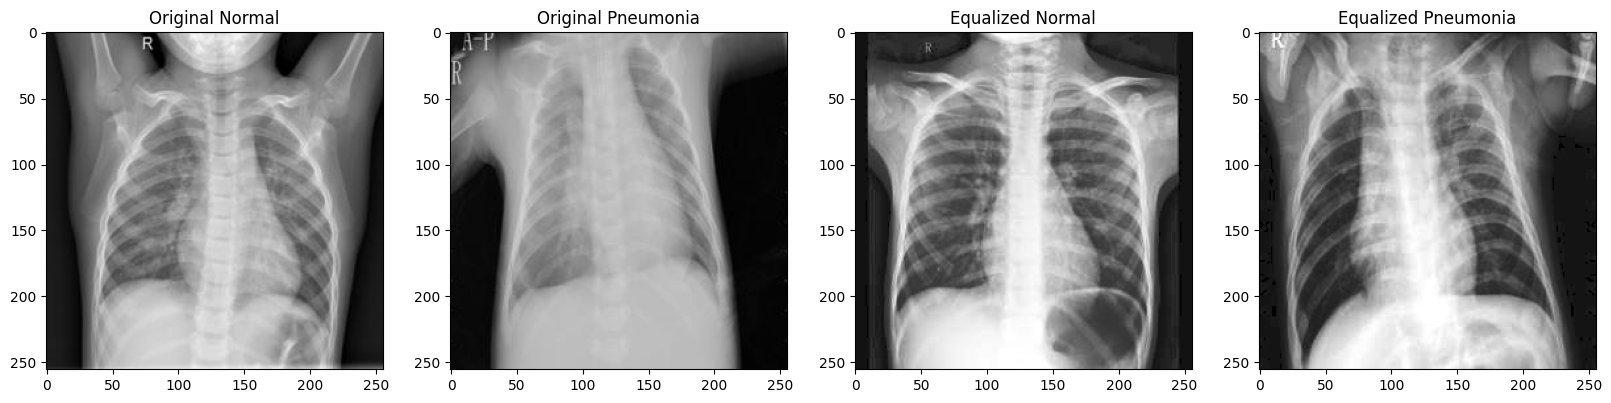

In [20]:
# Set up the figure for displaying the images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Show the first image from the original normal folder
axes[0].imshow(Image.open(datafolder_train.samples[0][0]))
axes[0].set_title('Original Normal')

# Show the first image from the original pneumonia folder
axes[1].imshow(Image.open(datafolder_train.samples[len(datafolder_train)//2][0]))
axes[1].set_title('Original Pneumonia')

img_path = os.path.join(equalized_normal_path, os.listdir(equalized_normal_path)[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
equalized_img = cv2.equalizeHist(img)
axes[2].imshow(equalized_img, cmap='gray')
axes[2].set_title('Equalized Normal')

# Load and equalize the first image from the equalized pneumonia folder
img_path = os.path.join(equalized_pneumonia_path, os.listdir(equalized_pneumonia_path)[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
equalized_img = cv2.equalizeHist(img)
axes[3].imshow(equalized_img, cmap='gray')
axes[3].set_title('Equalized Pneumonia')

plt.show()


# Segmentation

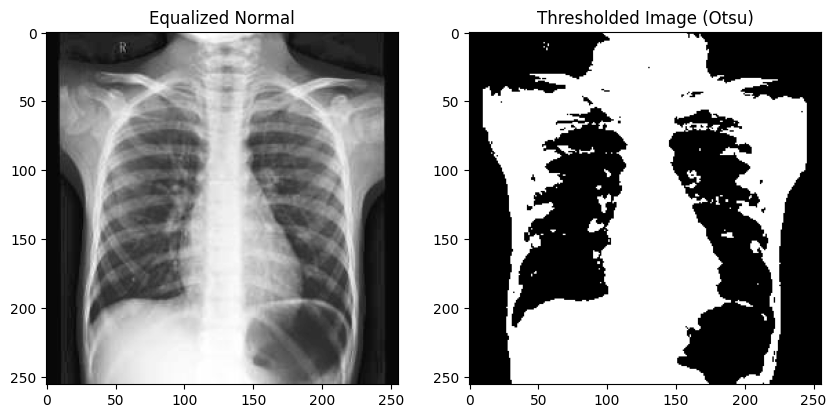

In [21]:
# Load the first image from the equalized normal folder
img_path = os.path.join(equalized_normal_path, os.listdir(equalized_normal_path)[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding to the image
thresh_value, thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Equalized Normal')
axes[1].imshow(thresh_img, cmap='gray')
axes[1].set_title('Thresholded Image (Otsu)')
plt.show()

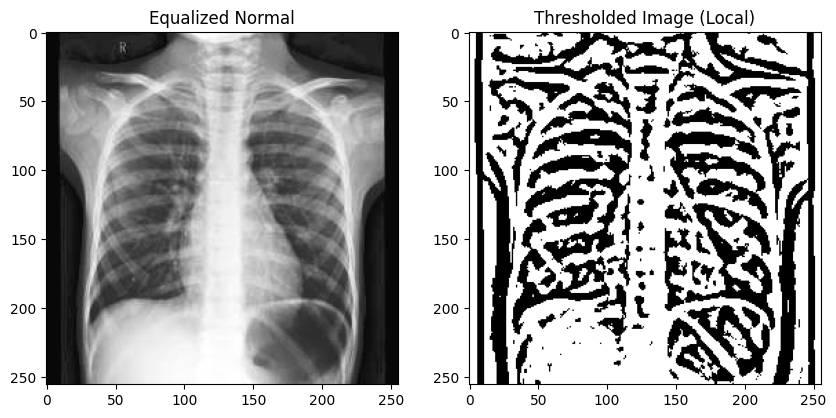

In [22]:
# Load the first image from the equalized normal folder
img_path = os.path.join(equalized_normal_path, os.listdir(equalized_normal_path)[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply local thresholding to the image
thresh_img = cv2.medianBlur(img, 5)
thresh_img = cv2.adaptiveThreshold(thresh_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Equalized Normal')
axes[1].imshow(thresh_img, cmap='gray')
axes[1].set_title('Thresholded Image (Local)')
plt.show()

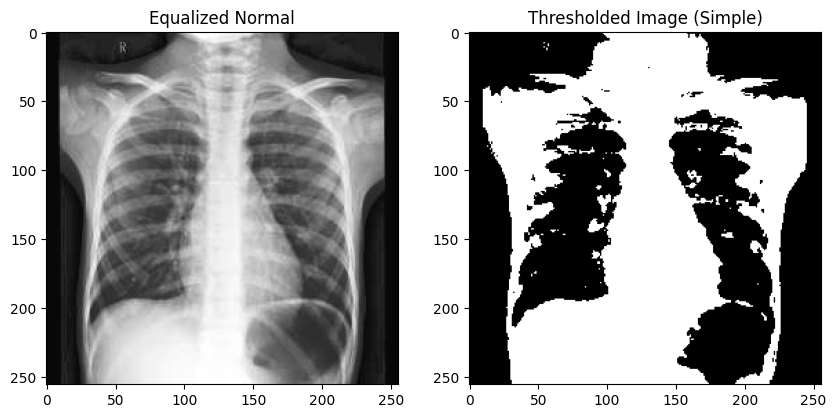

In [23]:
# Load the first image from the equalized normal folder
img_path = os.path.join(equalized_normal_path, os.listdir(equalized_normal_path)[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply simple thresholding to the image
_, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Equalized Normal')
axes[1].imshow(thresh_img, cmap='gray')
axes[1].set_title('Thresholded Image (Simple)')
plt.show()

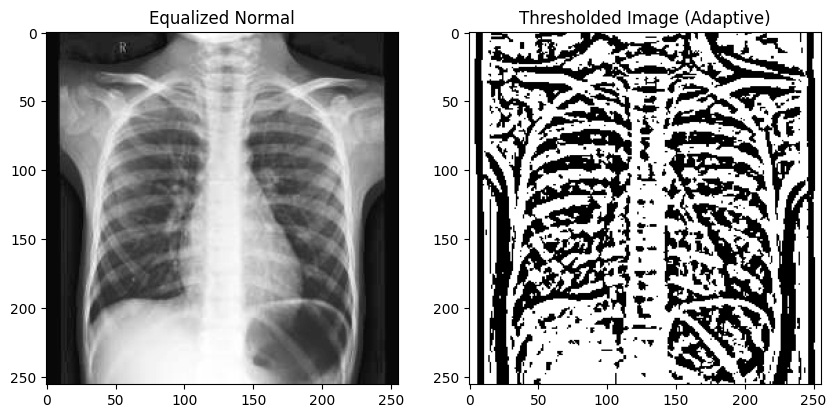

In [24]:
# Load the first image from the equalized normal folder
img_path = os.path.join(equalized_normal_path, os.listdir(equalized_normal_path)[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding to the image
thresh_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Equalized Normal')
axes[1].imshow(thresh_img, cmap='gray')
axes[1].set_title('Thresholded Image (Adaptive)')
plt.show()

# MODEL

In [25]:
from skimage.feature import hog
from sklearn.neural_network import MLPClassifier

# Set paths for equalized images
equalized_normal_path = "equalized_normal_train"
equalized_pneumonia_path = "equalized_pneumonia_train"

# Function to extract HOG features
def extract_hog_features(image):
    features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True, multichannel=False)
    return features

# Function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

# Extract HOG features for normal images
normal_images_path = os.path.join(equalized_normal_path)
normal_hog_features = []
for image_file in os.listdir(normal_images_path):
    image_path = os.path.join(normal_images_path, image_file)
    preprocessed_image = preprocess_image(image_path)
    hog_features = extract_hog_features(preprocessed_image)
    normal_hog_features.append(hog_features)
normal_hog_features = np.array(normal_hog_features)

# Extract HOG features for pneumonia images
pneumonia_images_path = os.path.join(equalized_pneumonia_path)
pneumonia_hog_features = []
for image_file in os.listdir(pneumonia_images_path):
    image_path = os.path.join(pneumonia_images_path, image_file)
    preprocessed_image = preprocess_image(image_path)
    hog_features = extract_hog_features(preprocessed_image)
    pneumonia_hog_features.append(hog_features)
pneumonia_hog_features = np.array(pneumonia_hog_features)

# Combine HOG features and labels
X = np.concatenate((normal_hog_features, pneumonia_hog_features))
y = np.concatenate((np.zeros(len(normal_hog_features)), np.ones(len(pneumonia_hog_features))))

# Train an ANN model
model = MLPClassifier(hidden_layer_sizes=(X.shape[1], X.shape[1] // 2),
                      max_iter=500,
                      batch_size=50)
model.fit(X, y)


<ipython-input-25-45e9928509ef>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


MLPClassifier(batch_size=50, hidden_layer_sizes=(2048, 1024), max_iter=500)

In [26]:
# Define the paths to the test data folders
equalized_normal_test = "equalized_normal_test"
equalized_pneumonia_test = "equalized_pneumonia_test"

# Extract HOG features for normal test images
normal_test_images_path = os.path.join(equalized_normal_test)
normal_test_hog_features = []
for image_file in os.listdir(normal_test_images_path):
    image_path = os.path.join(normal_test_images_path, image_file)
    preprocessed_image = preprocess_image(image_path)
    hog_features = extract_hog_features(preprocessed_image)
    normal_test_hog_features.append(hog_features)
normal_test_hog_features = np.array(normal_test_hog_features)

# Extract HOG features for pneumonia test images
pneumonia_test_images_path = os.path.join(equalized_pneumonia_test)
pneumonia_test_hog_features = []
for image_file in os.listdir(pneumonia_test_images_path):
    image_path = os.path.join(pneumonia_test_images_path, image_file)
    preprocessed_image = preprocess_image(image_path)
    hog_features = extract_hog_features(preprocessed_image)
    pneumonia_test_hog_features.append(hog_features)
pneumonia_test_hog_features = np.array(pneumonia_test_hog_features)

# Combine HOG features and labels for test data
X_test = np.concatenate((normal_test_hog_features, pneumonia_test_hog_features))
y_test = np.concatenate((np.zeros(len(normal_test_hog_features)), np.ones(len(pneumonia_test_hog_features))))

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy, precision, and recall
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)


<ipython-input-25-45e9928509ef>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


# Accuracy

In [39]:
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 83.32051282051282
Precision: 84.01492537313433
Recall: 88.97435897435898


In [3]:
pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [5]:
import mlflow
import mlflow.sklearn
import mlflow.pyfunc
from skimage.feature import hog
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import os
import cv2
import pickle
mlflow.set_experiment('Disease Detection')


# Set MLflow tracking URI to local hostSSS
mlflow.set_tracking_uri("http://localhost:5000")

# Start an MLflow run
with mlflow.start_run(run_name="training"):
    # Load the model
    model_path = 'model.pkl'
    model = pickle.load(open(model_path, 'rb'))
#     model = mlflow.sklearn.load_model(model_path)

    # Load the features and labels
    features_path = 'features.npy'
    labels_path = 'labels.npy'
    X = np.load(features_path)
    y = np.load(labels_path)

    # Log the parameters and artifacts
    mlflow.log_params(model.get_params())

    # Make predictions on the training data
    train_predictions = model.predict(X)

    # Calculate the training accuracy, precision, and recall
    train_accuracy = accuracy_score(y, train_predictions)
    train_precision = precision_score(y, train_predictions)
    train_recall = recall_score(y, train_predictions)

    # Log the training metrics
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("train_precision", train_precision)
    mlflow.log_metric("train_recall", train_recall)



    # Combine HOG features and labels for test data
    X_test = np.load('X_test.npy')
    y_test = np.load('y_test.npy')
    # Make predictions on the test data
    test_predictions = model.predict(X_test)

    # Calculate the test accuracy, precision, and recall
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)

    # Log the test metrics
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)
    mlflow.sklearn.log_model(model,'Model')
    # Save the HOG features and labels for test data
#     np.save('/home/talha/Downloads/X_test.npy', X_test)
#     np.save('/home/talha/Downloads/y_test.npy', y_test)
#     mlflow.log_artifact('/home/talha/Downloads/X_test.npy')
#     mlflow.log_artifact('/home/talha/Downloads/y_test.npy')

    # Log the MLflow run ID and experiment ID
#     mlflow.log_param("mlflow_run_id", mlflow.active_run().info.run_id)
#     mlflow.log_param("mlflow_experiment_id", mlflow.active_run().info.experiment_id)


/home/talha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/talha/anaconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/talha/anaconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
